<a href="https://colab.research.google.com/github/salsabilayya/DataMining/blob/main/Checkpoint%20(2)_Tsurayya_Salsabila_(2209116076).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Which Ketchup is Best?**

#**Import Library**

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('Ketchup.csv')
data = pd.DataFrame({'x':np.arange(1,101),'y':np.random.normal(0,4,100)})

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4956 entries, 0 to 4955
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      4956 non-null   int64  
 1   Ketchup.hid     4956 non-null   int64  
 2   Ketchup.id      4956 non-null   int64  
 3   Ketchup.choice  4956 non-null   object 
 4   price.heinz     4956 non-null   float64
 5   price.hunts     4956 non-null   float64
 6   price.delmonte  4956 non-null   float64
 7   price.stb       4956 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 309.9+ KB


#**BUSINESS UNDERSTANDING**

##**Business Objective**

Masukkan Business Objective Kalian DisiniKetchup (saus tomat) banyak digunakan sebagai penambah rasa makanan. Namun, merk ketchup sangat banyak di minimarket, sehingga akan susah untuk mencari brand mana yang paling enak. Tujuan dataset ini adalah untuk mencari tahu preferensi ketchup pelanggan dan ketchup mana yang paling disukai oleh pelanggan.

##**Assess Situation**

Semua brand ketchup yang beredar di minimarket saling bersaing, masing masing brand memiliki preferensi yang berbeda terhadap pelanggannya. Setiap pelanggan memiliki alasannya kenapa memilih ketchup tersebut, dan tanpa adanya paksaan.

##**Data Mining Goals**

Tujuan analisis data ini untuk mengidentifikasi preferensi pelanggan dalam memilih ketchup berdasarkan seleranya. Data mining ini juga dapat membantu mengidentifikasi faktor tertentu yang berkaitan dengan persepsi kualitas ketchup. Selain itu, juga dapat menganalisis hubungan antara harga dan preferensi konsumen.

##**Project Plan**

Rencana proyek dalam melakukan analisis dataset ini dimulai dengan pengumpulan data dengan dilakukannya survey. Survey ini berisikan ketchup preferensi pelanggan, alasan dibalik pilihan mereka, dan informasi demografis karakteristik responden.

#**DATA UNDERSTANDING**

##**Collect Initial Data**

Jelaskan darimana sumber data kalian di sini, sertakan linknya juga ya

In [4]:
df = pd.read_csv("Ketchup.csv")
df.head()

# https://www.kaggle.com/datasets/ulrikthygepedersen/which-ketchup-is-best

,Unnamed: 0,Ketchup.hid,Ketchup.id,Ketchup.choice,price.heinz,price.hunts,price.delmonte,price.stb
0,1,1,1,heinz,1.19,1.39,1.49,0.89
1,2,1,2,heinz,0.99,1.36,1.39,0.95
2,3,1,3,hunts,1.46,1.43,1.49,0.99
3,4,1,4,hunts,1.46,1.43,1.45,0.99
4,5,1,5,stb,1.46,1.36,1.39,0.95


##**Describe Data**

####Informasi Dasar

In [5]:
df.shape

(4956, 8)

Dari dataset yang ada, ditemukan sebanyak 4.956 baris dan 8 kolom.

####Informasi Lanjutan

In [6]:
df.columns

Index(['Unnamed: 0', 'Ketchup.hid', 'Ketchup.id', 'Ketchup.choice',
       'price.heinz', 'price.hunts', 'price.delmonte', 'price.stb'],
      dtype='object')

Pada dataset Ketchup, terdapat 8 kolom, yaitu kolom Unnamed: 0, Ketchup.hid, Ketchup.id, Ketchup.choice, price.heinz, price.hunts, price.delmonte, dan price.stb.

1. Unnamed: 0 = kolom tidak bernama dengan tipe data int64.
2. Ketchup.hid = tipe data kolom ini adalah int64
3. Ketchup.id = ini adalah kolom yang berisikan id ketchup dengan tipe data int64.
4. Ketchup.choice = kolom ini berisi pilihan ketchup dengan tipe data object.
5. Price.heinz = kolom harga ketchup heinz dengan tipe data float64.
6. Price.hunts = kolom harga ketchup hunts dengan tipe data float64.
7. Price.delmonte = kolom harga ketchup delmonte dengan tipe data float64.
8. Price.stb = kolom harga ketchup stb dengan tipe data float64.

####Informasi Statistik Deskriptif

In [7]:
df.describe()

,Unnamed: 0,Ketchup.hid,Ketchup.id,price.heinz,price.hunts,price.delmonte,price.stb
count,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000
mean,2478.500000,936.721550,3.095642,1.248900,1.343860,1.426945,0.921178
std,1430.818297,549.104119,3.065865,0.204913,0.176185,0.114157,0.068198
min,1.000000,1.000000,1.000000,0.790000,0.790000,0.890000,0.750000
25%,1239.750000,463.750000,1.000000,0.990000,1.360000,1.390000,0.890000
50%,2478.500000,923.000000,2.000000,1.190000,1.390000,1.460000,0.950000
75%,3717.250000,1406.000000,4.000000,1.460000,1.430000,1.490000,0.950000
max,4956.000000,1956.000000,24.000000,1.470000,1.530000,1.490000,0.990000


Jumlah data yang ada pada tabel dataset adalah 4956.000000. Adapun hasil statistik deskriptif lainnya adalah sebagai berikut. (hasil dari setiap kolom berurutan: Unnamed:0, Ketchup.hid, Ketchup.id, Price.heinz, Price.hunts, Price.delmonte, Price.stb)
1. Mean = 2478.500000, 936.721550,	3.095642,	1.248900,	1.343860,	1.426945,	0.921178.

2. STD = 1430.818297,	549.104119,	3.065865,	0.204913,	0.176185,	0.114157,	0.068198.

3. Min = 1.000000,	1.000000,	1.000000,	0.790000,	0.790000,	0.890000,	0.750000.

4. 25% = 1239.750000,	463.750000,	1.000000,	0.990000,	1.360000,	1.390000,	0.890000.

5. 50% = 2478.500000,	923.000000,	2.000000,	1.190000,	1.390000,	1.460000,	0.950000.

6. 75% = 3717.250000,	1406.000000,	4.000000,	1.460000,	1.430000,	1.490000,	0.950000.

7. Max = 4956.000000,	1956.000000,	24.000000,	1.470000,	1.530000,	1.490000,	0.990000.

##**Exploratory Data Analysis**

In [8]:
fig = px.bar(df, x='Ketchup.choice', y='price.heinz', title='Ketchup Prices')

fig.update_xaxes(title='Brand')
fig.update_yaxes(title='Price')

fig.show()

In [9]:
df['preference_count'] = df.groupby('Ketchup.choice')['Ketchup.choice'].transform('count')
df['preference_percent'] = (df['preference_count'] / df['preference_count'].sum()) * 100

fig = px.pie(df, values='preference_percent', names='Ketchup.choice', title='Ketchup Preference')
fig.show()


Dapat disimpulkan dari dua diagram di atas adalah bahwa Ketchup merk Heinz memiliki harga paling tinggi dan yang menjadi preferensi banyak orang. Berbanding terbalik dengan Delmonte yang harganya paling murah dan paling sedikit untuk jadi preferensi konsumen. Sedangkan untuk merk Hunts dan STB memiliki selisih yang sedikit sehingga hampir seri, namun masih tinggi merk STB dibandingkan merk Hunts.

##**Verify Data Quality**

####Missing Values

In [10]:
df.describe()

,Unnamed: 0,Ketchup.hid,Ketchup.id,price.heinz,price.hunts,price.delmonte,price.stb,preference_count,preference_percent
count,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000,4956.000000
mean,2478.500000,936.721550,3.095642,1.248900,1.343860,1.426945,0.921178,1779.378128,0.020178
std,1430.818297,549.104119,3.065865,0.204913,0.176185,0.114157,0.068198,783.486622,0.008884
min,1.000000,1.000000,1.000000,0.790000,0.790000,0.890000,0.750000,256.000000,0.002903
25%,1239.750000,463.750000,1.000000,0.990000,1.360000,1.390000,0.890000,1019.000000,0.011555
50%,2478.500000,923.000000,2.000000,1.190000,1.390000,1.460000,0.950000,2526.000000,0.028644
75%,3717.250000,1406.000000,4.000000,1.460000,1.430000,1.490000,0.950000,2526.000000,0.028644
max,4956.000000,1956.000000,24.000000,1.470000,1.530000,1.490000,0.990000,2526.000000,0.028644


Pada dataset Ketchup tidak terdapat missing values. Semua kolom dan baris memiliki value nya masing-masing.

####Outliers Values

<ipython-input-11-779446a26f73>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='Ketchup.choice', ylabel='price.heinz'>

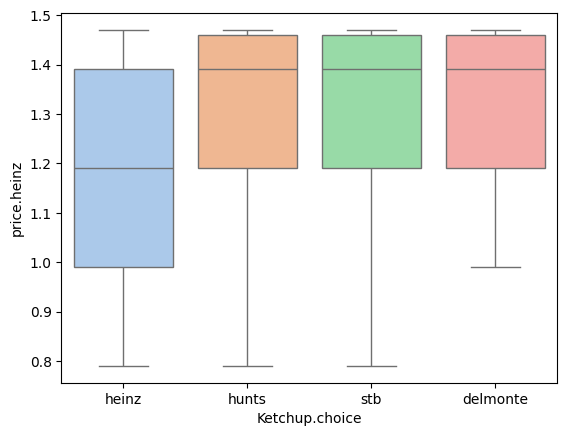

In [11]:
sns.boxplot(x='Ketchup.choice', y='price.heinz', data=df, palette='pastel')


Berdasarkan visualisasi boxplot yang menampilkan merk dan harga ketchup di atas dapat disimpulkan bahwa tidak terdapat outliers (pencilan) pada dataset yang ada.

####Duplicated Values

In [12]:
duplicate_rows = df[df.duplicated()]

print("Data yang dupilkat didalam dataset:")
print(duplicate_rows)

Data yang dupilkat didalam dataset:
Empty DataFrame
Columns: [Unnamed: 0, Ketchup.hid, Ketchup.id, Ketchup.choice, price.heinz, price.hunts, price.delmonte, price.stb, preference_count, preference_percent]
Index: []


In [13]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4951    False
4952    False
4953    False
4954    False
4955    False
Length: 4956, dtype: bool

Setelah syntax dijalankan, outputnya yaitu tidak terdapat data yang dupilkat didalam dataset ini.

####Inconsistent Values / Noise (Optional)

In [14]:
#Tambahkan kode untuk mengecek apakah ada nilai inkosisten/noise pada tiap kolom di dataset kalian ya (OPSIONAL)

Jangan lupa juga untuk berikan penjelasan di sini (OPSIONAL)